In [ ]:
!pip install --upgrade pandas
!pip install --upgrade pandas-datareader

     |████████████████████████████████| 109 kB 24.6 MB/s 
  Attempting uninstall: pandas-datareader
    Found existing installation: pandas-datareader 0.9.0
    Uninstalling pandas-datareader-0.9.0:
      Successfully uninstalled pandas-datareader-0.9.0


In [ ]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
import pandas_datareader as pdr 
import pandas as pd
import numpy as np
from datetime import datetime
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
from statsmodels.stats.diagnostic import het_arch
from statsmodels.tsa.statespace.varmax import VARMAX

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
import math

def rev(df):
    ans = []
    for i in range(df.size-1):
        ans.append(math.log(df[i+1]/df[i]))
    return pd.Series(ans, index = df.index[:-1])


def get_data(names, st, en):
    data = [] 
    for i in names:
        data.append(100*rev(pdr.get_data_yahoo(str(i), start=st, end=en).Close).rename(str(i)))
    return data


In [ ]:
names = ['^NDX', 'EWH', '^RUT' ]
step = 1

In [ ]:
train = pd.concat(get_data(names,datetime(2017,1,1), datetime(2019,12,29)), axis= 1)

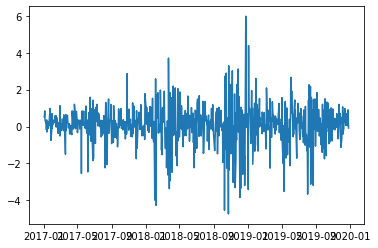

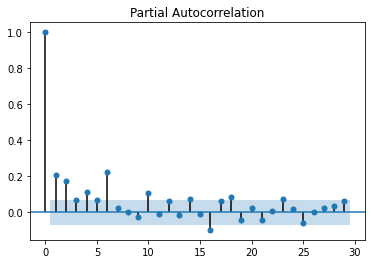

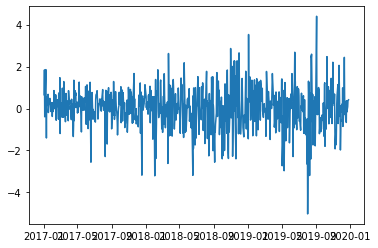

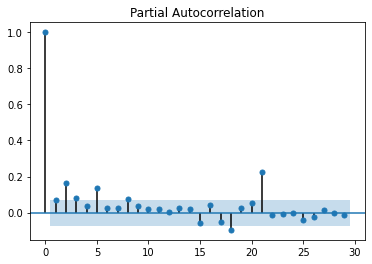

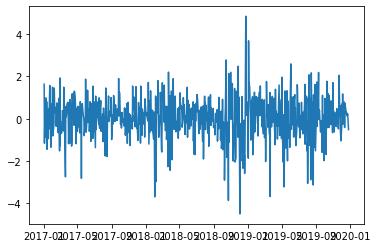

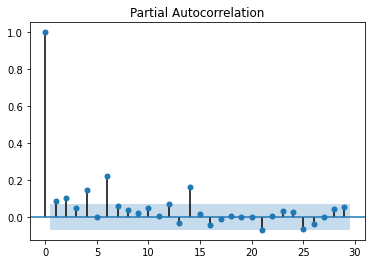

ADF Statistic for ^NDX: -3.955501
p-value: 0.001662
Critical Values:
	1%: -3.439
	5%: -2.865
	10%: -2.569
ADF Statistic for EWH: -3.928425
p-value: 0.001835
Critical Values:
	1%: -3.439
	5%: -2.866
	10%: -2.569
ADF Statistic for ^RUT: -4.125958
p-value: 0.000877
Critical Values:
	1%: -3.439
	5%: -2.865
	10%: -2.569


In [ ]:
resid = train - train.mean()
var = np.power(resid, 2)
for i in train:
    plt.plot(train[str(i)])
    plot_pacf(train[str(i)]**2)
    plt.show()
#for i in var:
    #plt.plot(var[str(i)])
    #plt.show()
for i in var:
    var_check = adfuller(var[str(i)])
    print('ADF Statistic for %s: %f' % (str(i), var_check[0]))
    print('p-value: %f' % var_check[1])
    print('Critical Values:')
    for key, value in var_check[4].items():
        print('\t%s: %.3f' % (key, value))

In [ ]:
from statsmodels.stats.diagnostic import het_arch

In [ ]:
for i in var:
    res = het_arch(train[str(i)],  maxlag=20)
    print('Lagrange multiplier test statistic for %s %f '% (str(i), res[0]))
    print('p-value for Lagrange multiplier test ',res[1])
    print('fstatistic for F test ',res[2])
    print('pvalue for F test ',res[3])

Lagrange multiplier test statistic for ^NDX 127.721589 
p-value for Lagrange multiplier test  1.0415545449278706e-17
fstatistic for F test  7.515794275561999
pvalue for F test  1.1898081812850323e-19
Lagrange multiplier test statistic for EWH 61.113600 
p-value for Lagrange multiplier test  4.782362922505592e-06
fstatistic for F test  3.2386577878717677
pvalue for F test  2.6366433162531577e-06
Lagrange multiplier test statistic for ^RUT 90.809205 
p-value for Lagrange multiplier test  5.349983659143211e-11
fstatistic for F test  5.035571890375744
pvalue for F test  8.45298524853859e-12


In [ ]:
!apt-get install bessel

Reading package lists... Done
Building dependency tree       
Reading state information... Done
E: Unable to locate package bessel


In [ ]:
!apt-get -qq install -y libgmp-dev

Selecting previously unselected package libgmpxx4ldbl:amd64.
(Reading database ... 155203 files and directories currently installed.)
Preparing to unpack .../libgmpxx4ldbl_2%3a6.1.2+dfsg-2_amd64.deb ...
Unpacking libgmpxx4ldbl:amd64 (2:6.1.2+dfsg-2) ...
Selecting previously unselected package libgmp-dev:amd64.
Preparing to unpack .../libgmp-dev_2%3a6.1.2+dfsg-2_amd64.deb ...
Unpacking libgmp-dev:amd64 (2:6.1.2+dfsg-2) ...
Setting up libgmpxx4ldbl:amd64 (2:6.1.2+dfsg-2) ...
Setting up libgmp-dev:amd64 (2:6.1.2+dfsg-2) ...
Processing triggers for libc-bin (2.27-3ubuntu1.3) ...
/sbin/ldconfig.real: /usr/local/lib/python3.7/dist-packages/ideep4py/lib/libmkldnn.so.0 is not a symbolic link



In [ ]:
!apt-get install libmpfr-dev

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following packages were automatically installed and are no longer required:
  libnvidia-common-460 nsight-compute-2020.2.0
Use 'apt autoremove' to remove them.
Suggested packages:
  libmpfr-doc
The following NEW packages will be installed:
  libmpfr-dev
0 upgraded, 1 newly installed, 0 to remove and 42 not upgraded.
Need to get 249 kB of archives.
After this operation, 1,232 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 libmpfr-dev amd64 4.0.1-1 [249 kB]
Fetched 249 kB in 0s (509 kB/s)
Selecting previously unselected package libmpfr-dev:amd64.
(Reading database ... 155221 files and directories currently installed.)
Preparing to unpack .../libmpfr-dev_4.0.1-1_amd64.deb ...
Unpacking libmpfr-dev:amd64 (4.0.1-1) ...
Setting up libmpfr-dev:amd64 (4.0.1-1) ...


In [ ]:
import rpy2.robjects as rpy  # loading rpy2
from rpy2.robjects.packages import importr
# import R's "base" package
base = importr('base')

# import R's "utils" package
utils = importr('utils')
utils.chooseCRANmirror(ind=1) 

<rpy2.rinterface_lib.sexp.NULLType object at 0x7ff2bea1c140> [RTYPES.NILSXP]

In [ ]:
packnames = ('rugarch', 'rmgarch')

# R vector of strings
from rpy2.robjects.vectors import StrVector
import rpy2.robjects.packages as rpackages

# Selectively install what needs to be install.
# We are fancy, just because we can.
names_to_install = [x for x in packnames if not rpackages.isinstalled(x)]
if len(names_to_install) > 0:
    utils.install_packages(StrVector(names_to_install))

R[write to console]: Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: also installing the dependencies ‘misc3d’, ‘gmp’, ‘truncnorm’, ‘FNN’, ‘kernlab’, ‘mclust’, ‘multicool’, ‘mvtnorm’, ‘plot3D’, ‘pracma’, ‘DistributionUtils’, ‘GeneralizedHyperbolic’, ‘Rmpfr’, ‘Rsolnp’, ‘ks’, ‘numDeriv’, ‘spd’, ‘xts’, ‘zoo’, ‘chron’, ‘SkewHyperbolic’, ‘Rcpp’, ‘RcppArmadillo’, ‘Bessel’, ‘ff’, ‘shape’, ‘pcaPP’, ‘corpcor’


R[write to console]: trying URL 'https://cloud.r-project.org/src/contrib/misc3d_0.9-1.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 66802 bytes (65 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to cons

In [ ]:
from rpy2.robjects import pandas2ri
import rpy2.robjects as robjects 
import numpy as np

# # pd_rets - a pandas dataframe of daily returns, where the column names are the tickers of stocks and index is the trading days.

# # compute DCC-Garch in R using rmgarch package
pandas2ri.activate()
r_rets = pandas2ri.py2rpy(train) # convert the daily returns from pandas dataframe in Python to dataframe in R
r_dccgarch_code = """
                 library('rmgarch')
                 function(r_rets, n_days){
                         univariate_spec <- ugarchspec(mean.model = list(armaOrder = c(7,1)),
                                                     variance.model = list(garchOrder = c(1,1), 
                                                                         model = "sGARCH"),
                                                     distribution.model = "norm")
                         biivariate_spec <- ugarchspec(mean.model = list(armaOrder = c(0,0)),
                                                     variance.model = list(garchOrder = c(1,2), 
                                                                         model = "sGARCH"),
                                                     distribution.model = "norm")
                         n <- dim(r_rets)[2]
                         dcc_spec <- dccspec(uspec = multispec(replicate(n, univariate_spec)),
                                             dccOrder = c(1,1),
                                             distribution = "mvnorm")
                         dcc_fit <- dccfit(dcc_spec, data=r_rets)
                         forecasts <- dccforecast(dcc_fit, n.ahead = n_days)
                         list(dcc_fit, forecasts@mforecast$H)
                         #summary(dcc_fit)
                         #plot(dcc_fit)
                 }
                 """




r_dccgarch = robjects.r(r_dccgarch_code)

In [ ]:
r_res = r_dccgarch(r_rets,1)

In [ ]:
print(r_res[1]) #4, 2

[[1]]
, , 1

          [,1]      [,2]      [,3]
[1,] 0.4112633 0.2292267 0.2661911
[2,] 0.2292267 0.5171290 0.1668901
[3,] 0.2661911 0.1668901 0.4397978





In [ ]:
print(r_res[1])#7,1

[[1]]
, , 1

          [,1]      [,2]      [,3]
[1,] 0.4167986 0.2345029 0.2611668
[2,] 0.2345029 0.5004058 0.1727962
[3,] 0.2611668 0.1727962 0.4159049





In [ ]:
print(r_res[1])#6,3

[[1]]
, , 1

          [,1]      [,2]      [,3]
[1,] 0.4112633 0.2292267 0.2661911
[2,] 0.2292267 0.5171290 0.1668901
[3,] 0.2661911 0.1668901 0.4397978





In [ ]:
print(r_res[1])

[array([[[0.82394487],
        [0.51825117],
        [0.70250134]],

       [[0.51825117],
        [2.43209759],
        [1.30200041]],

       [[0.70250134],
        [1.30200041],
        [2.02675497]]])]


In [ ]:
pandas2ri.deactivate()

In [ ]:
#Матрица для данных с 2017- 2019 арма 1,0
[[0.4228407, 0.2325084, 0.2723930],
[0.2325084, 0.5154912, 0.1747376],
[0.2723930, 0.1747376, 0.4253406]]

[[0.4228407, 0.2325084, 0.272393],
 [0.2325084, 0.5154912, 0.1747376],
 [0.272393, 0.1747376, 0.4253406]]

In [ ]:
r_dccgarch_model = r_res[0] # model parameters
r_forecast_cov = r_res[1] # forecasted covariance matrices for n_days
# # access and transform the covariance matrices in R format
n_cols = train.shape[1] # get the number of stocks in pd_rets
n_elements = n_cols*n_cols # the number of elements in each covariance matrix
n_matrix = 1

# # sum the daily forecasted covariance matrices 
cov_matrix = 0
for i in range(n_matrix):
  i_matrix = np.array([v for v in r_forecast_cov[0][i*n_elements:(i+1)*n_elements]])
  i_matrix = i_matrix.reshape(n_cols,n_cols)    
  cov_matrix += i_matrix

1
1


In [ ]:
cov_matrix

array([[0.5630241 , 0.31636148, 0.43257815],
       [0.31636148, 0.9380847 , 0.49074431],
       [0.43257815, 0.49074431, 1.45111105]])

In [ ]:
utils.install_packages('mgarchBEKK')

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: also installing the dependencies ‘quadprog’, ‘tseries’


R[write to console]: trying URL 'https://cloud.r-project.org/src/contrib/quadprog_1.5-8.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 36141 bytes (35 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console

<rpy2.rinterface_lib.sexp.NULLType object at 0x7f7a39adfcd0> [RTYPES.NILSXP]

In [ ]:
r_bekkgarch_code = """
                 library('MTS')
                 function(r_rets, n_days){
                          x = BEKK11(r_rets)
                          forecast
                 }
                 """
r_bekkgarch = robjects.r(r_bekkgarch_code)

In [ ]:
bekk_res = r_bekkgarch(r_rets, 1)

Initial estimates:  0.001417182 0.0001383232 0.0007670943 0.01806841 0.01033611 0.01642275 0.01129839 0.003675445 0.01182622 0.1 0.02 0.02 0.02 0.1 0.02 0.02 0.02 0.1 0.8 0.02 0.02 0.02 0.8 0.02 0.02 0.02 0.8 
Lower limits:  -0.01417182 -0.001383232 -0.007670943 0.003613683 0.002067221 0.003284551 0.002259678 0.000735089 0.002365243 1e-06 -0.5 -0.5 -0.5 1e-06 -0.5 -0.5 -0.5 1e-06 1e-06 -0.5 -0.5 -0.5 1e-06 -0.5 -0.5 -0.5 1e-06 
Upper limits:  0.01417182 0.001383232 0.007670943 0.01987526 0.01136972 0.01806503 0.01242823 0.004042989 0.01300884 0.999999 0.5 0.5 0.5 0.999999 0.5 0.5 0.5 0.999999 0.999999 0.5 0.5 0.5 0.999999 0.5 0.5 0.5 0.999999 
Log likelihood function:  4736.247 

Coefficient(s):
             Estimate   Std. Error  t value   Pr(>|t|)    
mu1.^NDX  1.61263e-03  4.44075e-04  3.63143 0.00028185 ***
mu2.EWH   7.07748e-05  5.40302e-04  0.13099 0.89578241    
mu3.^RUT  9.62722e-04  4.52840e-04  2.12596 0.03350640 *  
A011      3.61368e-03  6.19450e-04  5.83370 5.4213e-09 ***


In [ ]:
bekk_res[-1]

array([8.72664255e-05, 5.92682064e-05, 4.24740013e-05, 5.92682064e-05,
       1.44529301e-04, 6.04099684e-05, 4.24740013e-05, 6.04099684e-05,
       1.04995097e-04])

In [ ]:
utils.install_packages('BEKKs')

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: also installing the dependencies ‘plyr’, ‘globals’, ‘listenv’, ‘parallelly’, ‘fracdiff’, ‘lmtest’, ‘urca’, ‘cubature’, ‘reshape2’, ‘mathjaxr’, ‘gridExtra’, ‘ggfortify’, ‘future’, ‘forecast’, ‘future.apply’, ‘GAS’, ‘pbapply’


R[write to console]: trying URL 'https://cloud.r-project.org/src/contrib/plyr_1.8.7.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 401481 bytes (392 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to c

<rpy2.rinterface_lib.sexp.NULLType object at 0x7f7a39adfcd0> [RTYPES.NILSXP]

In [ ]:
r_bekkgarch_code_2 = """
                 library('BEKKs')
                 function(r_rets, n_days){
                          data = as.matrix(r_rets)
                          spec <- bekk_spec()
                          x1 <- bekk_fit(spec, data)
                          #x2 <- bekk_forecast(x1, n.ahead = 1, ci = 1e-04)
                 }
                 """
r_bekkgarch_2 = robjects.r(r_bekkgarch_code_2)

In [ ]:
bekk_res_2 = r_bekkgarch_2(r_rets, 1)

R[write to console]: Error in bekk_forecast.bekk(x1, n.ahead = 1, ci = 1e-04) : 
  Lower and/or upper CI are not leading to a stationary BEKK model. Please decrease the cofidence level ci.



RRuntimeError: ignored

In [ ]:
print(bekk_res_2)


BEKK estimation results
-----------------------
Log-likelihood: -2364.36
BEKK model stationary: TRUE
Number of BHHH iterations: 6
AIC: 4770.72
BIC: 4775.114


In [ ]:
!pip install mgarch

  Created wheel for mgarch: filename=mgarch-0.2.0-py3-none-any.whl size=3379 sha256=184cdbd005f5a58dd8cd81ddf876506d8d6427f8a3385a46938aa7091a87d564
  Stored in directory: /root/.cache/pip/wheels/70/04/0f/902fe872c7729649f8aa41c1e07c685085fdfdc5ddc6407d7d
Successfully built mgarch


In [ ]:
import mgarch
mgarch_cov = mgarch.mgarch()
model_fit = mgarch_cov.fit(np.array(train))

In [ ]:
ndays = 1 # volatility of nth day
cov_nextday = mgarch_cov.predict(ndays)

In [ ]:
cov_nextday['cov']

array([[ 3.31480810e-05,  8.18128620e-06, -1.18946893e-06],
       [ 8.18128620e-06,  5.62948865e-05,  1.81156032e-06],
       [-1.18946893e-06,  1.81156032e-06,  7.68781738e-05]])

In [ ]:
mgarch_cov.summary()

AttributeError: ignored

In [ ]:
r_bekkgarch_code = """
                 library('mgarchBEKK')
                 function(r_rets, n_days){
                          estimated = BEKK11(r_rets)
                          results = data.frame('bekk.csd.variable1' = estimated$sd[[1]],
                                                'bekk.csd.variable2' = estimated$sd[[2]],
                                                'bekk.csd.variable3' = estimated$sd[[3]],
                                                'bekk.ccor.var1_var2' = estimated$[[1]][[2]]
                                                'bekk.ccor.var1_var3' = estimated$[[1]][[3]]
                                                'bekk.ccor.var2_var3' = estimated$[[2]][[3]])
                          tail(results, n = n_days)
                 }
                 """

In [ ]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [ ]:
%%R
library('utils')
library('quantmod')
library('rugarch')
library('rmgarch')
tr_start = as.Date("2018-12-20")
tr_end  = as.Date("2020-12-29")
tr_start = as.Date("2020-12-28")
tr_end  = as.Date("2020-12-29")
getSymbols("^NDX")
#ewh = diff(log(as.numeric(getSymbols("EWH", from = tr_start, to = tr_end))['Close'])) 
#rut = diff(log(as.numeric(getSymbols("^RUT", from = tr_start, to = tr_end))['Close']))
#r_rets = data.frame(ndx, ewh, rut)
ndx = dailyReturn(NDX, subset='2019::2021', type = 'log')

In [ ]:
%%R
library('utils')
library('quantmod')
library('rugarch')
library('rmgarch')
tr_start = as.Date("2018-12-20")
tr_end  = as.Date("2020-12-29")
tr_start = as.Date("2020-12-28")
tr_end  = as.Date("2020-12-29")
ndx = diff(log(getSymbols("^NDX", from = tr_start, to = tr_end)['Close']))
ewh = diff(log(getSymbols("EWH", from = tr_start, to = tr_end)['Close'])) 
rut = diff(log(getSymbols("^RUT", from = tr_start, to = tr_end)['Close']))
r_rets = data.frame(ndx, ewh, rut)
univariate_spec = ugarchspec(mean.model = list(armaOrder = c(0,0)),
                             variance.model = list(garchOrder = c(1,1),variance.targeting = FALSE, model = "sGARCH"),
                             distribution.model = "norm")
n = dim(r_rets)[2]
dcc_spec <- dccspec(uspec = multispec(replicate(n, univariate_spec)),
                    dccOrder = c(1,1),distribution = "mvnorm")
dcc_fit <- dccfit(dcc_spec, data=r_rets)
dcc_fit

R[write to console]: Error in .dccfit(spec = spec, data = data, out.sample = out.sample, solver = solver,  : 
  
dccfit-->error: function requires at least 100 data
 points to run

R[write to console]: In addition: 
R[write to console]: Warning messages:

R[write to console]: 1: 
R[write to console]: In read.table(file = file, header = header, sep = sep, quote = quote,  :
R[write to console]: 
 
R[write to console]:  incomplete final line found by readTableHeader on 'https://query2.finance.yahoo.com/v7/finance/download/^NDX?period1=1609113600&period2=1609200000&interval=1d&events=history'

R[write to console]: 2: 
R[write to console]: In diff(log(as.numeric(getSymbols("^NDX", from = tr_start, to = tr_end))["Close"])) :
R[write to console]: 
 
R[write to console]:  NAs introduced by coercion

R[write to console]: 3: 
R[write to console]: In read.table(file = file, header = header, sep = sep, quote = quote,  :
R[write to console]: 
 
R[write to console]:  incomplete final line found by r


Error in .dccfit(spec = spec, data = data, out.sample = out.sample, solver = solver,  : 
  
dccfit-->error: function requires at least 100 data
 points to run


RInterpreterError: ignored

In [ ]:
%%R
install.packages(c("utils", "Bessel", "rmgarch", "quantmod", "rugarch"))

R[write to console]: Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: also installing the dependency ‘TTR’


R[write to console]: trying URL 'https://cloud.r-project.org/src/contrib/TTR_0.24.3.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 317338 bytes (309 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to con